In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as p
from xgboost import XGBClassifier
import seaborn as sns


# Collecting data

In [2]:
###Loading a data into a dataframe
data = pd.read_csv('full_data.csv')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
# shape
print(data.shape)

(4981, 11)


# Data clenaing

In [3]:
#Clean the data
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
#Check the dublicate values
data.duplicated().sum()

0

# Exploaratory analysis

In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


<AxesSubplot:>

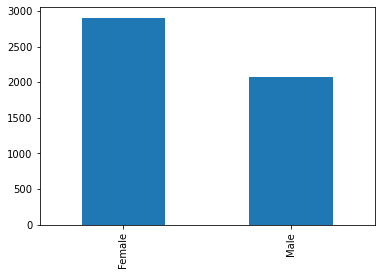

In [3]:
data['gender'].value_counts()
data['gender'].value_counts().plot(kind='bar')

# Bivariate analysis for stroke

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

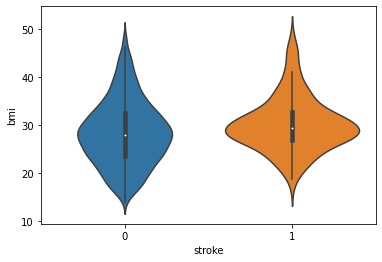

In [11]:
sns.violinplot(x="stroke",y='bmi',data=data)
#sns.scatterplot(x="stroke",y="bmi",data=data)

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

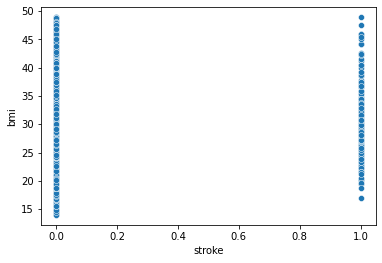

In [12]:
sns.scatterplot(data=data"stroke",y="bmi",data=data)

# Preparing Data

In [4]:
data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [5]:
from sklearn.utils import resample
#Upsampling all the minorities classes to the equal
#value of the majority class i.e. sample ='386'

data_stroke1 = resample(data[data['stroke']=='0'],
               replace=True,
               n_samples=4733,
               random_state=4233)

data_stroke2 = resample(data[data['stroke']=='1'],
               replace=True,
               n_samples=4733,
               random_state=4233)

data_upsampled = pd.concat([data_stroke1, data_stroke2])


# Display new class counts

data_upsampled['stroke'].value_counts()

ValueError: high <= 0

In [4]:
# Separating Data
X=data.drop(['stroke','ever_married','work_type','gender','Residence_type','smoking_status'],axis=1)
y=data['stroke']

# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from IPython.display import clear_output
!pip3 install -U lazypredict

clear_output()
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=42,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

In [9]:
models['Accuracy'][:29]


Model
NearestCentroid                 0.79
PassiveAggressiveClassifier     0.83
GaussianNB                      0.88
QuadraticDiscriminantAnalysis   0.89
DecisionTreeClassifier          0.92
ExtraTreeClassifier             0.91
Perceptron                      0.89
LabelPropagation                0.94
LabelSpreading                  0.94
BaggingClassifier               0.94
LGBMClassifier                  0.94
LinearDiscriminantAnalysis      0.94
XGBClassifier                   0.94
ExtraTreesClassifier            0.94
AdaBoostClassifier              0.95
KNeighborsClassifier            0.94
BernoulliNB                     0.94
LogisticRegression              0.95
CalibratedClassifierCV          0.95
RidgeClassifier                 0.95
RidgeClassifierCV               0.95
SGDClassifier                   0.95
SVC                             0.95
LinearSVC                       0.95
DummyClassifier                 0.91
RandomForestClassifier          0.94
Name: Accuracy, dtype: float64

In [12]:
models['confusion matrix'][:29]

KeyError: 'confusion matrix'

In [4]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3984, 5)
(3984,)
(997, 5)
(997,)


In [5]:
#Scaling X data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
###KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
###Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[940   7]
 [ 49   1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       947
           1       0.12      0.02      0.03        50

    accuracy                           0.94       997
   macro avg       0.54      0.51      0.50       997
weighted avg       0.91      0.94      0.92       997



In [15]:
LR=LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9498495486459378
[[947   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



C:\Users\pushp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
RF=RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9438314944834504
[[940   7]
 [ 49   1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       947
           1       0.12      0.02      0.03        50

    accuracy                           0.94       997
   macro avg       0.54      0.51      0.50       997
weighted avg       0.91      0.94      0.92       997



In [20]:
XGB=XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\pushp\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9418254764292878
[[937  10]
 [ 48   2]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       947
           1       0.17      0.04      0.06        50

    accuracy                           0.94       997
   macro avg       0.56      0.51      0.52       997
weighted avg       0.91      0.94      0.92       997



In [13]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

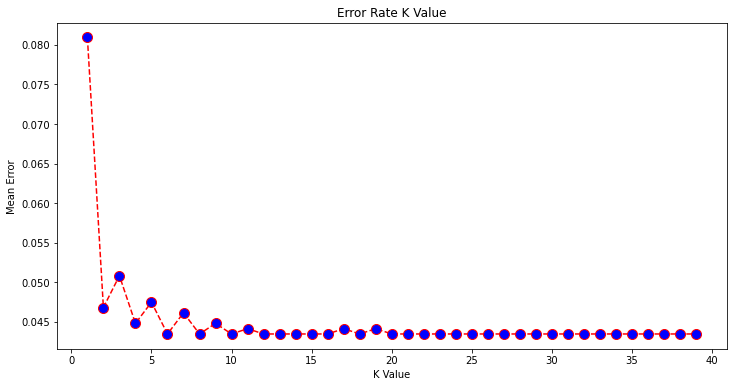

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Correlation alanlysis

<AxesSubplot:>

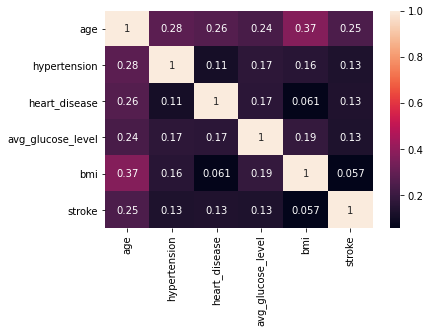

In [7]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [6]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

# Build Models

In [8]:
# Let’s evaluate 2 different algorithms:

# Algorithms
from sklearn import model_selection
models = []
models.append(('GB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

NameError: name 'seed' is not defined

# Decision Tree

In [10]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 543 nodes with maximum depth 19.
Model Accuracy: 1.0


In [12]:
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1430
           1       0.07      0.09      0.08        65

    accuracy                           0.90      1495
   macro avg       0.51      0.52      0.51      1495
weighted avg       0.92      0.90      0.91      1495



# Balanced Data

# svm

In [9]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train,y_train)

predicted_labels = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell,)
    for label in labels:
        print ("%{0}s".format(columnwidth) % label,)
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1,)
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell,)
        print

conf = confusion_matrix(y_test, predicted_labels)

In [10]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('FP classification accuracy = %f' % accuracy(conf))

FP classification accuracy = 0.949850


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1430
           1       0.07      0.09      0.08        65

    accuracy                           0.90      1495
   macro avg       0.51      0.52      0.51      1495
weighted avg       0.92      0.90      0.91      1495



In [25]:
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))


 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1430
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.96      0.94      1495


 confussion matrix:
 [[1430    0]
 [  65    0]]


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Network models

In [ ]:
Neural Network models
First model
number of hidden layer = 1 with 10 nodes. The network will have one input layer and one output layer and 1 hidden layer.
Second model
number of hidden layer = 2. Each hidden layer will have 50 nodes. The network will have one input layer and one output layer and 2 hidden layers.
Some important parameters for training:

validation_fraction: During the optimization process, fraction of the training set will be used as a validation data. The weights in the model will be updated by optimizing the log loss (binary cross entropy) calculated by using the predictions by the model in the validation data and actual class labels of the validation data.
early_stopping: terminate training when validation score is not improving.
Full information here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Without cross validation, without hyper parameter optimization
Here, we will not perform hyper parameter optimization. We will simply choose some specific values for the model parameters.
No k-fold cross validation will be performed.

In [21]:
from sklearn.neural_network import MLPClassifier
nn_model1 = MLPClassifier(hidden_layer_sizes=(10,),
                          activation='relu', # activation in the hidden layers
                          solver = 'adam', # optimizer name
                          alpha = 0, # L2 regularization parameter
                          batch_size = 50, # batch size
                          learning_rate = 'constant', 
                          learning_rate_init = 0.001, # learning rate
                          early_stopping=True, # how to stop training the model
                          validation_fraction=0.1, # how much of training set is used as validation set.
                          n_iter_no_change = 10)

nn_model2 = MLPClassifier(hidden_layer_sizes=(10,10,),
                          activation='relu',
                          solver = 'adam',
                          alpha = 0,
                          batch_size = 50,
                          learning_rate = 'constant',
                          learning_rate_init = 0.001,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change = 10)

In [22]:
nn_model1.fit(X_train, y_train)

MLPClassifier(alpha=0, batch_size=50, early_stopping=True,
              hidden_layer_sizes=(10,))

In [ ]:
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [24]:
nn_model2.fit(X_train, y_train)

MLPClassifier(alpha=0, batch_size=50, early_stopping=True,
              hidden_layer_sizes=(10, 10))

Text(0.5, 1.0, 'model with 1 layer')

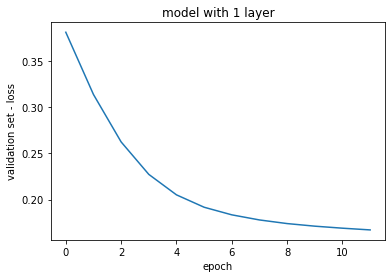

In [25]:
from matplotlib import pyplot as plt

ax = plt.plot(nn_model1.loss_curve_)
plt.xlabel("epoch")
plt.ylabel("validation set - loss")
plt.title("model with 1 layer")

Text(0.5, 1.0, 'model with 2 layers')

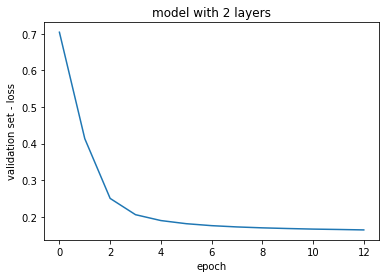

In [26]:
ax = plt.plot(nn_model2.loss_curve_)
plt.xlabel("epoch")
plt.ylabel("validation set - loss")
plt.title("model with 2 layers")